# Principal Component Analysis

---

PCA is an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
PCA analysis is perfromed either using EVD of the covariance matrix or the SVD of the mean-centered data.


## Prerequisites

The reader should be familiar with linear algebra and statistics concepts.

## Competences 

The reader should be able to perform PCA on a given data set.

## References

For more details see

* [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis),
* [L. I. Smith, A tutorial on Principal Components Analysis](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf),
* [J. Shlens, A Tutorial on Principal Components Analysis][Shl14].

[Shl14]: http://arxiv.org/abs/1404.1100 "Jonathon Shlens, 'A Tutorial on Principal Component Analysis', arXiv:1404.1100, 2014."

## Definitions

A __data matrix__ is a matrix $X\in\mathbb{R}^{m\times n}$, where each column corresponds to a feature (say, certain gene), and each row correspond to an observation (say, individual).

A __mean__ of a vector $x\in\mathbb{R}^{n}$ is $\mu(x)=\displaystyle \frac{x_1+x_2+\cdots x_n}{n}$.

A __standard deviation__  of a vector $x$ is $\sigma(x)=\displaystyle \sqrt{\frac{\sum_{i=1}^n (x_i-\mu(x))^2}{n-1}}$.
A __variance__ of a vector $x$ is $var(x)=\sigma^2(x)$.

A __vector of means__ of a data matrix $X$ is a row-vector of means of the columns of $X$,
$\mu(X)=\begin{bmatrix}\mu(X_{:,1}) & \mu(X_{:,2}) & \ldots & \mu(X_{:,n})\end{bmatrix}$. 

A __zero-mean centered data matrix__ is a matrix $\bar X$ obtained from a data matrix $X$ by subtracting from each column the mean of this column,
$$
\bar X= \begin{bmatrix} X_{:,1}-\mu(X_{:,1}) & X_{:,2}-\mu(X_{:,2}) & \cdots & 
X_{:,n}-\mu(X_{:,n}) \end{bmatrix}\equiv
X-\mathbf{1}\mu(X),
$$
where $\mathbf{1}=[1,1,\ldots,1]^T$.

A __covariance matrix__ of a data matrix $X$ is a matrix
$$
cov(X)=\displaystyle \frac{1}{n-1}[X-\mathbf{1}\mu(X)]^T[X-\mathbf{1}\mu(X)]
\equiv \frac{\bar X^T \bar X}{n-1}.
$$

## Facts

Given a data matrix $X$, let $cov(X)=U\Lambda U^T$ be the EVD with non-increasingly ordered eigenvalues, $\lambda_1\geq \lambda_2\geq \cdots \geq \lambda_n$. 

1. $cov(X)$  is a symmetric PSD matrix.

2. $cov(X)=cov(\bar X)$.

3. Let $T=\bar X U$. The columns of $T$ are the __principal components__ of $\bar X$. In particular:
    1. The first principal component of $\bar X$ (or $X$) is the first column, $T_{:,1}$. It is a projection of the zero-mean centered data set $\bar X$ on the line defined by $U_{:,1}$. This is the direction along which the data have the largest variance.  
    2. The second column (the second principal component), $T_{:,1}$, is 
a projection of $\bar X$ on the line defined by $U_{:,2}$, which is orthogonal to the first projection. This is direction with the largest variance _after_ subtracting the first principal component from $\bar X$. 
    3. The $k$-th principal component is the direction with the largest variance _after_ subtracting the first $k-1$ principal components from $\bar X$, that is, the first principal component of the matrix
$$
\hat X=\bar X-\sum_{i=1}^{k-1} \bar X U_{:,i} U_{:,i}^T.
$$

4. Let $\bar X=\bar U \Sigma V^T$ be the SVD of $\bar X$. Then $V=U$ and $T=\bar U\Sigma V^T V\equiv \bar U \Sigma$.

5. Reconstruction of the principal components is the following:
    1. Full reconstruction is $X=T U^T +\mathbf{1} \mu(X)$.
    2. Reconstruction from the first $k$ principal components is
    $\tilde X =T U_{:,1:k}^T +\mathbf{1} \mu(X)$.
    
6. Partial reconstructions can help obtaining various insights about the data. For example, the rows of the matrix $T_{:,1:k}$ can be clustered by the $k$-means algorithm, and the points defined by first three columns of $T$ can be
plotted to visualize projections of clusters. Afterwards, the computed clusters can be mapped back to original data.

7. Heuristical guess for number of important clusters is given be the location of the "knee" in the plot of the singular values of $\bar X$.

### Example - Elliptical data set

We generate a "quasi" elliptical set of points and compute its principal components. 

In [1]:
# Generate data points
n=3
m=500
ax=[8,3,1]
X=Array(Float64,m,n)
for i=1:n
    X[:,i]=rand!(X[:,i])*ax[i]
end
# Parameters
u=(rand(m)-0.5)*π
v=(rand(m)-0.5)*2*π
for i=1:m
    X[i,1]=X[i,1]*cos(u[i])*cos(v[i])
    X[i,2]=X[i,2]*cos(u[i])*sin(v[i])
    X[i,3]=X[i,3]*sin(u[i])
end

In [2]:
X0=copy(X)

500x3 Array{Float64,2}:
  1.16733     -0.255958    -0.565803  
 -1.23365      0.361763     0.361941  
  0.121376    -0.0912968   -0.0822644 
 -0.817148     1.0718       0.0437761 
 -3.4244      -2.10607     -0.252828  
 -0.161428     2.72779      0.0398468 
  4.17158      0.0224613   -0.211104  
 -0.228965    -1.29079      0.0661065 
 -1.01772      0.375041     0.882254  
 -0.471328     0.0383805   -0.525105  
 -1.06224      1.24535      0.0307377 
  1.98785      0.101407     0.0888309 
  5.62687      1.13674      0.263478  
  ⋮                                   
 -0.73109     -0.594582     0.174312  
 -3.37536     -1.62934     -0.0363199 
 -0.0639544    0.0868432    0.358064  
  0.00119598   0.00365277   0.917788  
 -0.896771    -0.73641      0.252674  
 -0.35889     -0.363813     0.899639  
 -2.83092     -0.00918657   0.171193  
  0.0249949    1.17926      0.332681  
 -4.64606      1.80153      0.00641655
  0.164225    -0.289255     0.430437  
 -5.87256     -0.0813349    0.292073  
 

In [3]:
using PyPlot

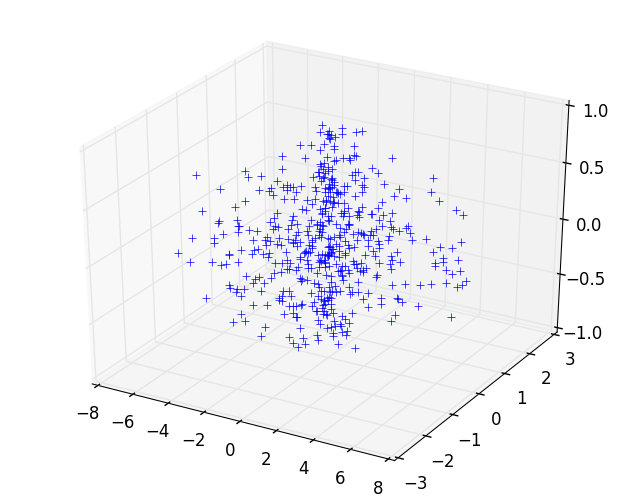

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f5c8c41ffd0>

In [4]:
plot3D(X0[:,1],X0[:,2],X0[:,3],"+")

In [5]:
# Compute the means. How good is the RNG?
μ0=mean(X,1)

1x3 Array{Float64,2}:
 -0.017171  -0.059913  0.016346

In [6]:
# Subtract the means
X=X.-μ0
# Rotate by a random orthogonal matrix
Q,r=qr(rand(3,3))
X=X*Q;

In [7]:
# Translate
S=[3,-2,4]

3-element Array{Int64,1}:
  3
 -2
  4

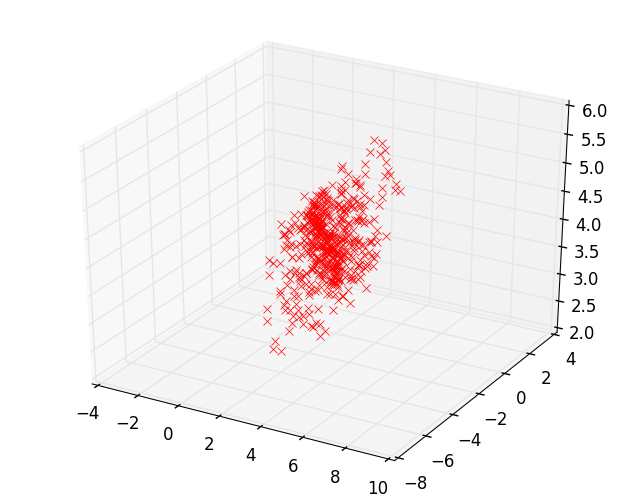

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f5c8c9e7e10>

In [8]:
X=X.+S'
# plot3D(X0[:,1],X0[:,2],X0[:,3],"b+")
plot3D(X[:,1],X[:,2],X[:,3],"rx" )

In [9]:
C=cov(X)

3x3 Array{Float64,2}:
  3.37995   -2.4358     0.695062
 -2.4358     2.62768   -0.270418
  0.695062  -0.270418   0.425738

In [10]:
μ=mean(X,1)

1x3 Array{Float64,2}:
 3.0  -2.0  4.0

In [11]:
# Fact 2
cov(X.-μ), (X.-μ)'*(X.-μ)/(m-1)

(
3x3 Array{Float64,2}:
  3.37995   -2.4358     0.695062
 -2.4358     2.62768   -0.270418
  0.695062  -0.270418   0.425738,

3x3 Array{Float64,2}:
  3.37995   -2.4358     0.695062
 -2.4358     2.62768   -0.270418
  0.695062  -0.270418   0.425738)

In [12]:
# Principal components, evals are non-decreasing
λ,U=eig(C)

([0.167829579566444,0.700475788350223,5.5650556928060375],
3x3 Array{Float64,2}:
 -0.441864  0.482251   0.756433
 -0.346583  0.685972  -0.639783
  0.827428  0.544864   0.135967)

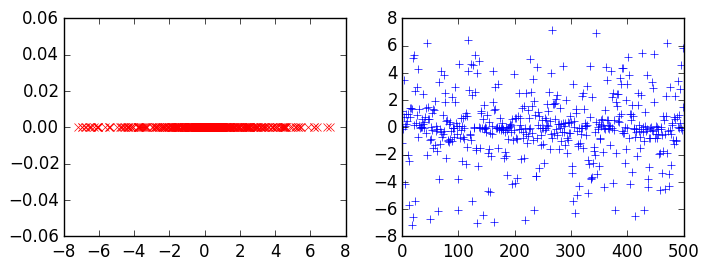

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5c8c28ec88>

In [13]:
# Largest principal component
T1=(X.-μ)*U[:,3]
subplot(221)
plot(T1,zeros(T1),"rx")
subplot(222)
plot(T1,"b+")

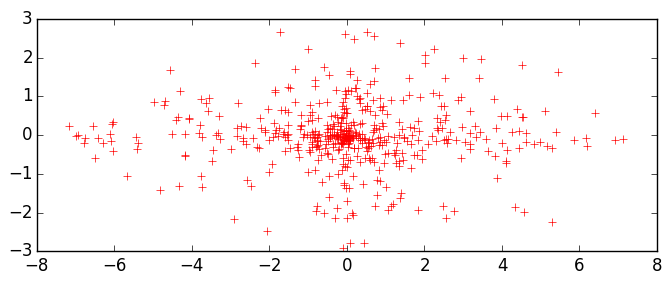

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5c8c1aa588>

In [14]:
# Two largest principal components
T2=(X.-μ)*U[:,[3,2]]
axes(aspect="equal")
plot(T2[:,1],T2[:,2],"r+")

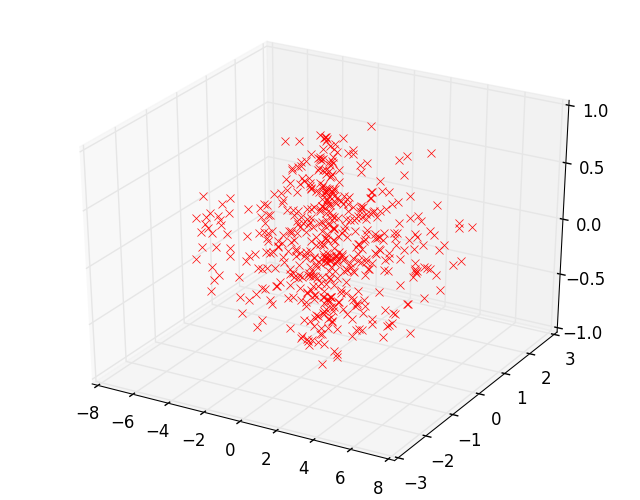

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f5c8c1767b8>

In [15]:
# All  three principal components
T=(X.-μ)*U[:,[3,2,1]]
plot3D(T[:,1],T[:,2],T[:,3],"rx" )

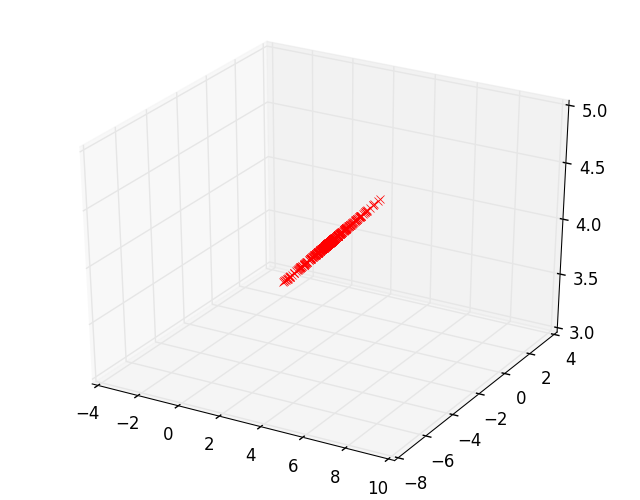

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f5c8c15e358>

In [16]:
# Fact 5 - Recovery of the largest component
Y1=T1*U[:,3]'.+μ
plot3D(Y1[:,1],Y1[:,2],Y1[:,3],"rx" )

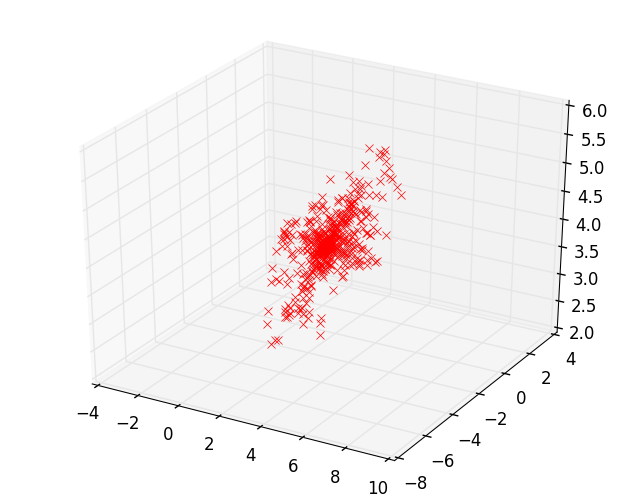

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f5c8c0b96a0>

In [17]:
# Recovery of the two largest components
Y2=T2*U[:,[3,2]]'.+μ
plot3D(Y2[:,1],Y2[:,2],Y2[:,3],"rx" )

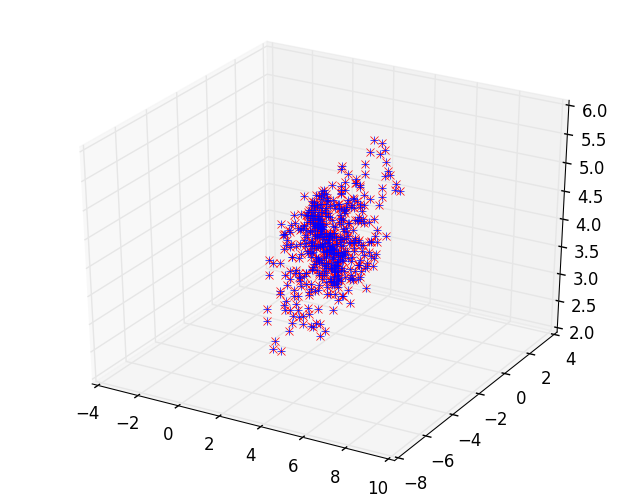

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f5c8c024dd8>

In [18]:
# Recovery of all three components (exact)
Y3=T*U[:,[3,2,1]]'.+μ
plot3D(Y3[:,1],Y3[:,2],Y3[:,3],"rx" )
plot3D(X[:,1],X[:,2],X[:,3],"b+" )

In [19]:
# Fact 4 - PCA using SVD
function myPCA{T}(X::Array{T}, k::Int)
    μ=mean(X,1)
    U,σ,V=svd(X.-μ)
    U[:,1:k]*diagm(σ[1:k])
end

myPCA (generic function with 1 method)

In [20]:
T1s=myPCA(X,1)
[T1s T1]

500x2 Array{Float64,2}:
 -1.17542    -1.17542  
  1.20316     1.20316  
 -0.137076   -0.137076 
  0.770821    0.770821 
  3.45968     3.45968  
  0.0733431   0.0733431
 -4.18796    -4.18796  
  0.242628    0.242628 
  0.983668    0.983668 
  0.454952    0.454952 
  1.01151     1.01151  
 -2.00889    -2.00889  
 -5.67404    -5.67404  
  ⋮                    
  0.726233    0.726233 
  3.39719     3.39719  
  0.0408711   0.0408711
 -0.0257068  -0.0257068
  0.894956    0.894956 
  0.343693    0.343693 
  2.81052     2.81052  
 -0.0755973  -0.0755973
  4.58015     4.58015  
 -0.17815    -0.17815  
  5.85217     5.85217  
  1.46156     1.46156  

In [21]:
# The two largest components using SVD
T2s=myPCA(X,2)
[T2s T2]

500x4 Array{Float64,2}:
 -1.17542    -0.235164   -1.17542     0.235164 
  1.20316     0.457833    1.20316    -0.457833 
 -0.137076   -0.0364299  -0.137076    0.0364299
  0.770821    1.15201     0.770821   -1.15201  
  3.45968    -1.96267     3.45968     1.96267  
  0.0733431   2.7905      0.0733431  -2.7905   
 -4.18796    -0.0278544  -4.18796     0.0278544
  0.242628   -1.22416     0.242628    1.22416  
  0.983668    0.473692    0.983668   -0.473692 
  0.454952    0.101401    0.454952   -0.101401 
  1.01151     1.33151     1.01151    -1.33151  
 -2.00889     0.111321   -2.00889    -0.111321 
 -5.67404     1.05624    -5.67404    -1.05624  
  ⋮                                            
  0.726233   -0.513798    0.726233    0.513798 
  3.39719    -1.48404     3.39719     1.48404  
  0.0408711   0.153192    0.0408711  -0.153192 
 -0.0257068   0.0770764  -0.0257068  -0.0770764
  0.894956   -0.650127    0.894956    0.650127 
  0.343693   -0.281339    0.343693    0.281339 
  2.81052     0.

### Example -  Real data 

We will cluster three datasets from [Workshop "Principal Manifolds-2006"](http://www.ihes.fr/~zinovyev/princmanif2006/):

Data set | # of genes (m) | # of samples (n)
:---:|---:|---:
D1 | 17816 | 286
D2 | 3036 | 40
D3 | 10383| 103

In [22]:
# Data set D1
f=readdlm("files/d1.txt")

17817x287 Array{Any,2}:
 "CHIP"                        "GSM36777"  …    "GSM37061"    "GSM37062"
 "1007_s_at"                  0.12             0            -0.43       
 "1053_at"                    0.14             0.46         -0.2        
 "117_at"                    -0.14            -0.8          -0.29       
 "121_at"                    -0.11             0.21          0.24       
 "1255_g_at"                 -0.73         …   0.52          0.72       
 "1294_at"                   -0.26            -0.13         -1.06       
 "1316_at"                   -0.05            -0.55         -0.05       
 "1405_i_at"                 -0.85            -2.92         -0.73       
 "1431_at"                   -0.67             0.67          0.58       
 "1438_at"                   -0.49         …   0.87         -1.63       
 "1487_at"                   -0.47            -0.11          0.32       
 "1494_f_at"                  3.97            -0.61         -0.17       
 ⋮                         

In [23]:
sizeof(f)

40907832

In [24]:
X=map(Float64,f[2:end,2:end])

17816x286 Array{Float64,2}:
  0.12   0.88   0.58   0.19   0.27  …  -0.2   -0.35  -0.24   0.0   -0.43
  0.14  -0.88  -0.22   0.94   1.01      0.36   0.02  -0.37   0.46  -0.2 
 -0.14  -0.31   0.2    0.41   0.48      0.56  -0.05   0.1   -0.8   -0.29
 -0.11   0.94   0.15   0.02  -0.06      0.05  -0.02   0.12   0.21   0.24
 -0.73   1.46  -0.32   1.03   0.39     -0.17  -0.23   1.47   0.52   0.72
 -0.26   0.28  -0.24  -0.21  -0.01  …  -0.18   0.38   0.01  -0.13  -1.06
 -0.05   0.6    0.0    0.04   0.02     -0.41  -0.6    0.0   -0.55  -0.05
 -0.85  -0.31  -2.45   0.69   2.71      0.05   0.75  -0.33  -2.92  -0.73
 -0.67   0.63   0.11   0.19   0.28     -0.83  -0.01  -0.1    0.67   0.58
 -0.49  -0.98  -0.92   2.08   1.26      0.16  -0.23  -0.19   0.87  -1.63
 -0.47   0.08   0.13   0.09   0.67  …   0.0    0.14   0.5   -0.11   0.32
  3.97   0.52   4.93  -0.25   0.16     -0.54  -0.45   0.16  -0.61  -0.17
  0.11   0.37  -0.38  -0.23  -0.72      0.43   0.41  -0.49  -0.28  -0.3 
  ⋮                    

In [25]:
# Clear a big variable
f=[]

0-element Array{Any,1}

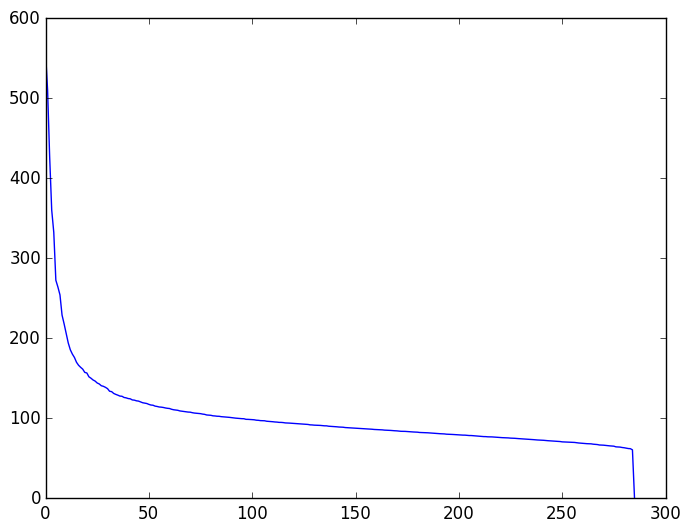

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5c8c00a0f0>

In [26]:
# Fact 7 - Plot σ's and observe the knee
μ=mean(X,1)
σ=svdvals(X.-μ)
plot(σ)

In [27]:
# PCA on X, keep 20 singular values
k=20
T=myPCA(X,k)

17816x20 Array{Float64,2}:
 -2.60997     1.29427    3.82777   …   0.416223   -0.908852    -0.339937 
  2.53162     6.72032    1.25924       0.950754   -0.53449      0.0961831
  2.63868     2.01813    2.13187       1.72483     0.513846    -0.0914956
 -0.631409   -0.94409    1.88523       0.440639   -0.745012     0.0996248
 -0.8162      0.174124   3.59941       1.30466    -2.34368      0.369603 
 -0.274186   -1.29081   -1.33486   …  -0.473495   -0.62421     -1.26462  
  0.401881   -0.738539   1.34847       0.39025    -0.00439161   0.0151878
 21.7269     -4.06805   -9.91123      -2.0272     -1.41633     -0.0263997
 -2.58371    -0.156413  -0.737911     -0.265203    1.58469      0.322162 
  4.17899    17.0184     1.83096       2.91487    -0.433558     1.164    
  0.772371    0.155414   1.66253   …  -0.833175    0.397829    -0.700775 
 -5.42643    -0.788577   1.64396      -1.44325     0.387156     0.840406 
  0.500175   -4.16445   -3.51728       0.221502    0.00109187  -1.79048  
  ⋮        

In [28]:
# Find k clusters
using Clustering
out=kmeans(T',k)

Clustering.KmeansResult{Float64}(20x20 Array{Float64,2}:
 12.7714      0.190977    15.5244    -1.29565    …  -0.00301044   5.75682   
 -1.77035    -0.583934    10.5428    13.2541        -2.74219     -0.745595  
  0.829446    1.31075    -10.903     -1.66399       -5.21303      5.3527    
  1.90392    -1.27954     -6.5508     2.47194        2.7828       2.18507   
 -6.58323    -0.18073      8.26394   -1.07976       -4.60841      2.00032   
  2.96367    -0.982709     0.216595   0.681603   …  -3.26543      0.579801  
  0.470521    0.306466     0.653384  -0.104422      -3.5321      -0.826487  
 -3.26094    -0.0474791   -4.1905     0.266698       3.6254       0.882696  
 -1.32942    -0.982074     0.804532   0.164148       0.701501    -0.587529  
 -1.03712    -0.067161     1.02203    0.124679       1.30368      0.946149  
  0.897632    0.088324     5.64087    0.105575   …   1.1923      -0.0464621 
 -1.24827     0.238238    -4.21214    0.0949709     -0.593888    -0.00522879
 -0.603898   -0.096

In [29]:
# Plot points defined by the first three principal components
function myPlot(C::Vector, T::Array, k::Int)
    P=Array(Any,k)
    for j=1:k
        P[j]=T[C.==j,1:3]
        plot3D(P[j][:,1],P[j][:,2],P[j][:,3],"x")
    end
end

myPlot (generic function with 1 method)

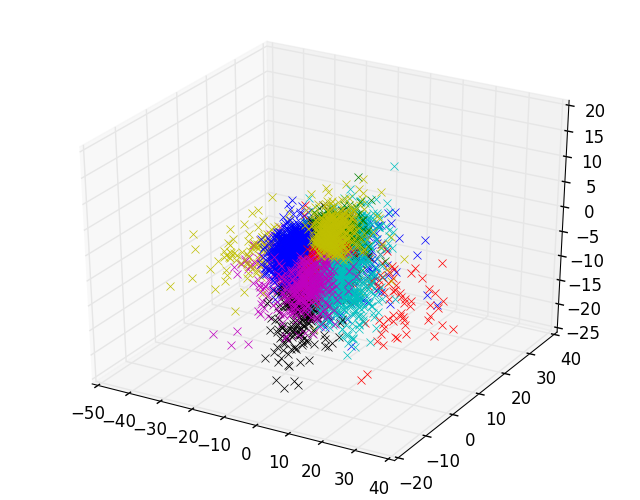

In [30]:
myPlot(out.assignments,T,k)

In [31]:
# Data set D2
X=readdlm("files/d2fn.txt")

3036x40 Array{Float64,2}:
  0.0681   0.072    0.3944  -0.0606  …  -0.3723  -0.2963  -0.619   -0.4171
  0.1402   0.2517   0.0843   0.1794     -0.1204   0.0086  -0.8177  -0.3646
  0.0081   0.3179   0.5802   0.0162     -0.2968  -0.3981  -1.055   -0.4583
  0.1049   0.3031   0.3048   0.2214     -0.288   -0.0841  -0.7231  -0.2951
  0.0609   0.4262   0.104    0.227      -0.3255  -0.1652  -0.6634  -0.4358
 -0.1163   0.2005  -0.2816   0.1192  …  -0.2508  -0.034   -0.5112  -0.1964
  0.1276   0.4596   0.3751   0.2379     -0.4025  -0.3775  -0.6091  -0.4265
  0.1362   0.4215   0.0645   0.3017     -0.3727  -0.3352  -0.642   -0.4601
  0.1455   0.3676   0.1463   0.2997     -0.4893  -0.5417  -0.6408  -0.5108
 -0.7093   0.6045  -0.6372  -0.6594     -0.1644  -0.0441   0.4404   0.4663
 -0.0044   0.1012   0.1362   0.432   …  -0.1594   0.4027  -0.5591  -0.1365
  0.1288   0.6568   0.7199   0.2173     -0.2006   0.0184  -1.1106   0.1015
  0.5014   0.6976   0.9516   0.6017     -1.168   -2.0287  -1.0887  -0.5792

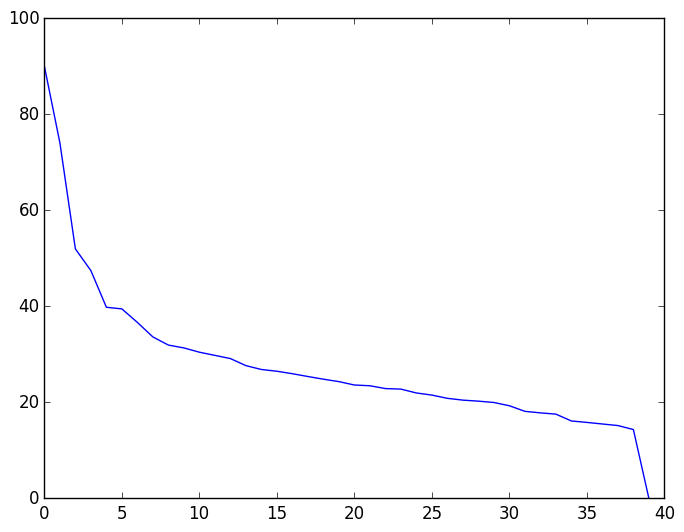

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5c8bd7ab70>

In [32]:
μ=mean(X,1)
σ=svdvals(X.-μ)
plot(σ)

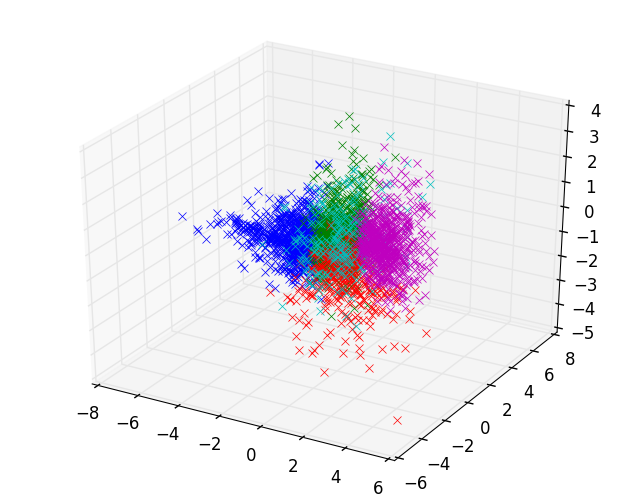

In [33]:
k=5
T=myPCA(X,k)
out=kmeans(T',k)
myPlot(out.assignments,T,k)

In [34]:
# Data set D3 which has NULL values.
X=readdlm("files/d3efn.txt")

10387x102 Array{Any,2}:
  0.179  -0.201     1.289     0.039    …  -0.961  -0.821    -0.551   1.279  
  1.042   0.162     0.612     0.472       -0.788  -0.598    -0.078    "NULL"
 -0.022  -0.482      "NULL"  -0.182        0.688   0.758    -0.002   0.108  
 -0.597   0.183     0.593    -0.467        0.253  -0.187    -0.707   0.393  
  0.699   0.639     0.739     0.349       -0.711  -3.391     0.769   1.519  
  1.035  -3.015    -2.255    -2.725    …  -1.235  -3.185    -0.895   1.845  
  0.64   -4.9      -4.24     -4.34        -1.04   -1.72     -1.41    2.62   
  0.904  -2.636    -2.446    -1.996       -0.986  -0.986    -0.976   1.114  
  0.74   -2.15       "NULL"  -3.43        -1.17   -0.95     -1.78    1.87   
  0.771    "NULL"  -1.389    -1.249       -1.829    "NULL"  -1.049   0.391  
  0.351  -0.829    -1.239    -0.679    …  -1.139  -0.279    -0.789   0.441  
  0.926  -1.034      "NULL"  -0.654        0.726   0.166    -0.104    "NULL"
 -0.216  -0.126     0.484     0.024       -1.206   0

We use the package [DataFrames.jl](https://github.com/JuliaStats/DataFrames.jl) and replace the "NULL" string with NA.

In [35]:
using DataFrames

In [36]:
sf = readtable("files/d3efn.txt", header=false, skipblanks=true,separator =' ',nastrings=["NULL"]);

In [37]:
# Set NA to zero (the choice is case-dependent).
X=Array(Float64,size(sf))
for i=1:size(sf,2)
    X[:,i]=convert(Array,sf[i],0.0)
end

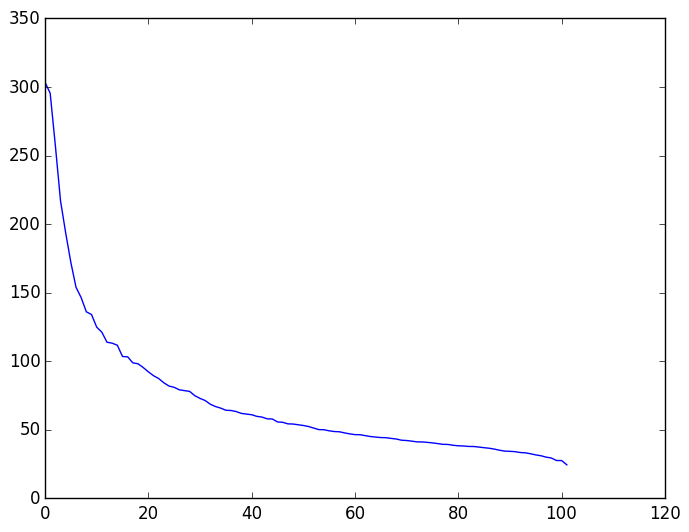

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5c8bdb4c18>

In [38]:
μ=mean(X,1)
σ=svdvals(X.-μ)
plot(σ)

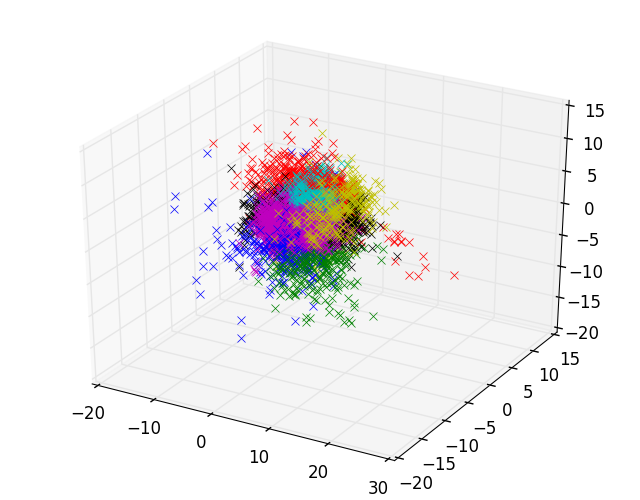

In [39]:
k=20
T=myPCA(X,k)
out=kmeans(T',k)
myPlot(out.assignments,T,k)

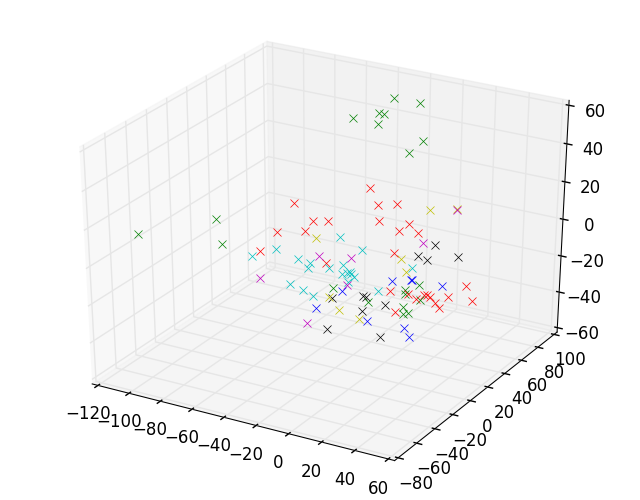

In [40]:
# Clustering the transpose
k=20
T=myPCA(X',k)
out=kmeans(T',k)
myPlot(out.assignments,T,k)